 # Crime Data Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


 ## 1. Load Dataset

In [2]:
df = pd.read_csv("dataset_cleaned.csv")

print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())


Dataset shape: (113118, 35)

Columns:
 ['District_Name', 'UnitName', 'FIR_YEAR', 'FIR_MONTH', 'Offence_Duration', 'FIR_Day', 'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name', 'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName', 'KGID', 'Internal_IO', 'Place of Offence', 'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female', 'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.', 'Accused_ChargeSheeted Count', 'Conviction Count', 'Unit_ID', 'FIR_DATE']


C:\Users\unmes\AppData\Local\Temp\ipykernel_17388\101985954.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_cleaned.csv")


 ## 2. Basic Information & Missing Values

In [3]:
print("\nInfo:")
df.info()

print("\nMissing values (%):")
(df.isna().mean() * 100).sort_values(ascending=False)



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113118 entries, 0 to 113117
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   District_Name                113118 non-null  object 
 1   UnitName                     113118 non-null  object 
 2   FIR_YEAR                     113118 non-null  int64  
 3   FIR_MONTH                    113118 non-null  int64  
 4   Offence_Duration             113118 non-null  int64  
 5   FIR_Day                      113118 non-null  int64  
 6   FIR Type                     113118 non-null  object 
 7   FIR_Stage                    113118 non-null  object 
 8   Complaint_Mode               113118 non-null  object 
 9   CrimeGroup_Name              113118 non-null  object 
 10  CrimeHead_Name               113118 non-null  object 
 11  Latitude                     113118 non-null  float64
 12  Longitude                    113118 non-null  float

District_Name                  0.0
VICTIM COUNT                   0.0
Village_Area_Name              0.0
Male                           0.0
Female                         0.0
Boy                            0.0
Girl                           0.0
Age 0                          0.0
Accused Count                  0.0
Distance from PS               0.0
Arrested Male                  0.0
Arrested Female                0.0
Arrested Count\tNo.            0.0
Accused_ChargeSheeted Count    0.0
Conviction Count               0.0
Unit_ID                        0.0
Beat_Name                      0.0
Place of Offence               0.0
UnitName                       0.0
Complaint_Mode                 0.0
FIR_YEAR                       0.0
FIR_MONTH                      0.0
Offence_Duration               0.0
FIR_Day                        0.0
FIR Type                       0.0
FIR_Stage                      0.0
CrimeGroup_Name                0.0
Internal_IO                    0.0
CrimeHead_Name      

 ## 3. Date Handling & Feature Extraction

In [4]:
df["FIR_DATE"] = pd.to_datetime(df["FIR_DATE"], errors="coerce")
df["year"] = df["FIR_DATE"].dt.year
df["month"] = df["FIR_DATE"].dt.month
df["weekday"] = df["FIR_DATE"].dt.day_name()

df[["FIR_DATE", "year", "month", "weekday"]].head()


,FIR_DATE,year,month,weekday
0,2020-01-01,2020,1,Wednesday
1,2020-01-04,2020,1,Saturday
2,2020-01-04,2020,1,Saturday
3,2020-01-05,2020,1,Sunday
4,2020-01-05,2020,1,Sunday


 ## 4. Crime Type Distribution (Top 10)

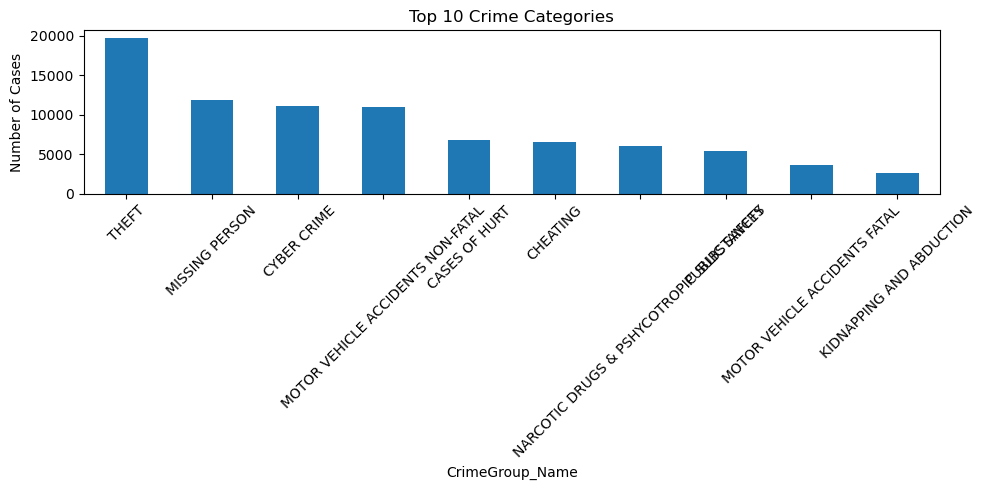

In [5]:
crime_counts = df["CrimeGroup_Name"].value_counts()

plt.figure(figsize=(10,5))
crime_counts.head(10).plot(kind="bar")
plt.title("Top 10 Crime Categories")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crime_counts.to_csv("crime_category_counts.csv")


 ## 5. Year-wise Crime Trend

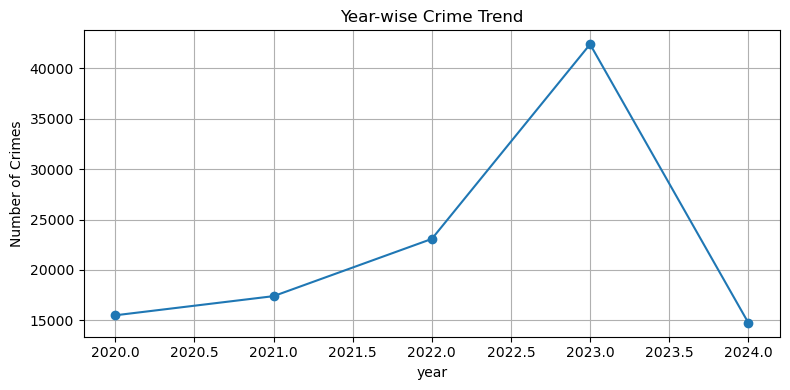

In [6]:
yearly = df.groupby("year").size()

plt.figure(figsize=(8,4))
yearly.plot(marker="o")
plt.title("Year-wise Crime Trend")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


 ## 6. Month-wise Crime Distribution

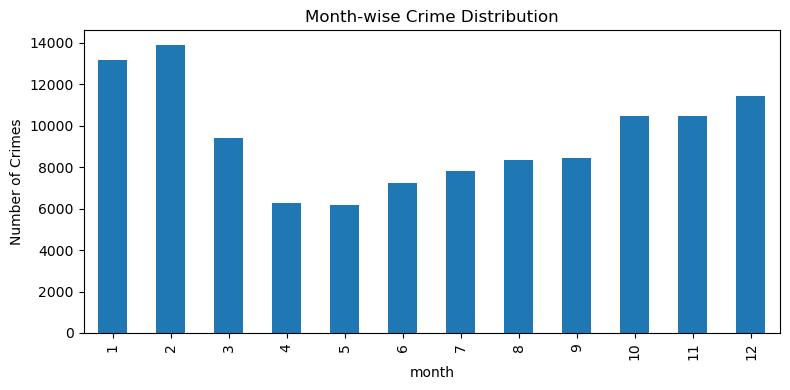

In [7]:
monthly = df.groupby("month").size()

plt.figure(figsize=(8,4))
monthly.plot(kind="bar")
plt.title("Month-wise Crime Distribution")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


 ## 7. Crime by Day of Week

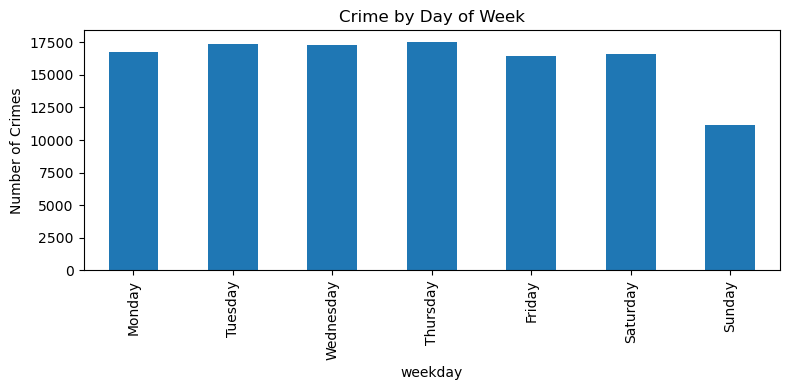

In [8]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_counts = df["weekday"].value_counts().reindex(weekday_order)

plt.figure(figsize=(8,4))
weekday_counts.plot(kind="bar")
plt.title("Crime by Day of Week")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()


 ## 8. Victim Analysis (Gender & Age)

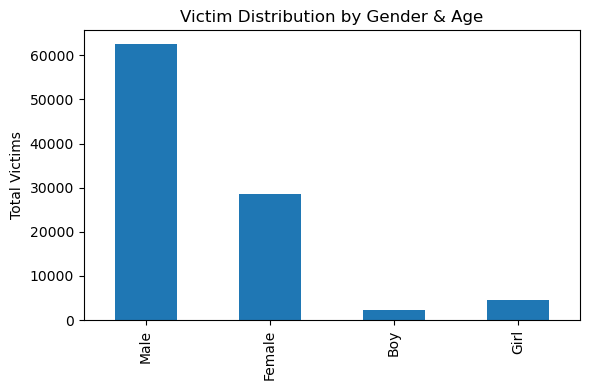

Male      63.762427
Female    29.133826
Boy        2.373694
Girl       4.730054
dtype: float64

In [9]:
victim_cols = ["Male", "Female", "Boy", "Girl"]
victim_data = df[victim_cols].sum()

plt.figure(figsize=(6,4))
victim_data.plot(kind="bar")
plt.title("Victim Distribution by Gender & Age")
plt.ylabel("Total Victims")
plt.tight_layout()
plt.show()

victim_ratio = (victim_data / victim_data.sum()) * 100
victim_ratio.to_csv("victim_gender_percentage.csv")

victim_ratio


 ## 9. Victims vs Accused (Overall)

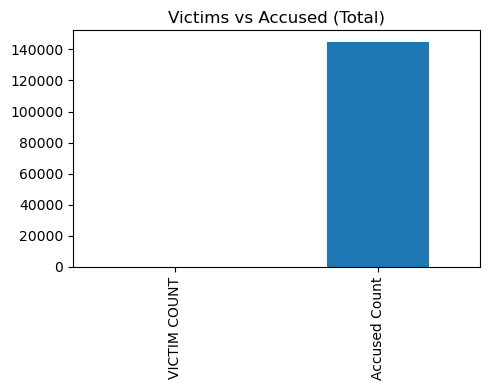

VICTIM COUNT         68
Accused Count    144998
dtype: int64

In [10]:
comparison = df[["VICTIM COUNT", "Accused Count"]].sum()

plt.figure(figsize=(5,4))
comparison.plot(kind="bar")
plt.title("Victims vs Accused (Total)")
plt.tight_layout()
plt.show()

comparison


 ## 10. Top 10 Police Stations by Crime Count

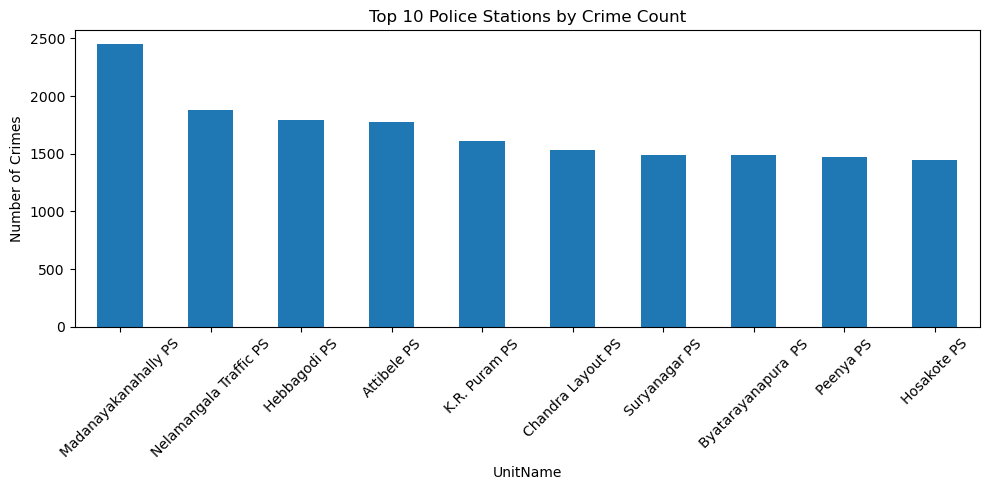

UnitName
Madanayakanahally PS      2447
Nelamangala Traffic PS    1876
Hebbagodi PS              1789
Attibele PS               1772
K.R. Puram PS             1611
Chandra Layout PS         1530
Suryanagar PS             1491
Byatarayanapura  PS       1488
Peenya PS                 1471
Hosakote PS               1448
Name: count, dtype: int64

In [11]:
top_ps = df["UnitName"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_ps.plot(kind="bar")
plt.title("Top 10 Police Stations by Crime Count")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_ps.to_csv("top_police_stations.csv")

top_ps


 ## 11. Spatial Distribution of Crimes (Raw Scatter)

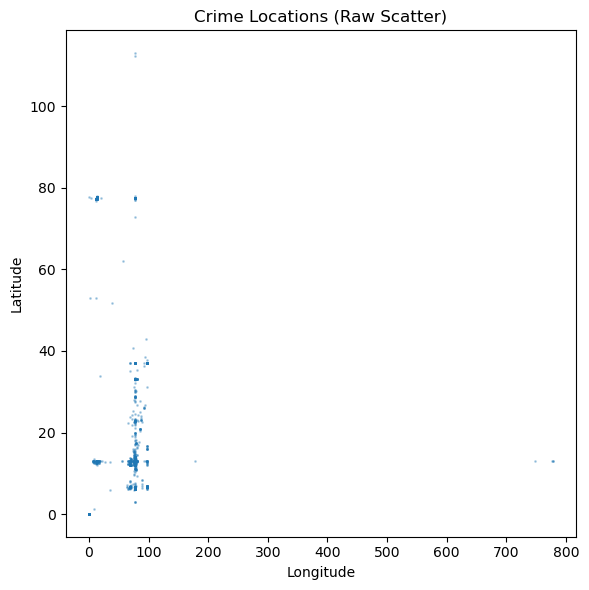

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(df["Longitude"], df["Latitude"], s=1, alpha=0.3)
plt.title("Crime Locations (Raw Scatter)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


 ## 12. FIR Case Status Distribution

C:\Users\unmes\AppData\Local\Temp\ipykernel_17388\1123404698.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


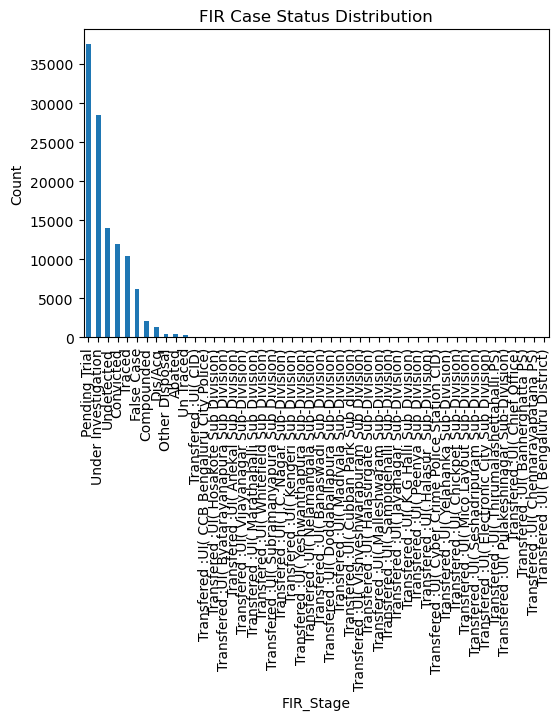

FIR_Stage
Pending Trial                                      37557
Under Investigation                                28421
Undetected                                         13967
Convicted                                          11907
Traced                                             10366
False Case                                          6133
Compounded                                          2052
Dis/Acq                                             1275
Other Disposal                                       466
Abated                                               371
Un Traced                                            251
Transfered :UI( CID)                                  95
Transfered :UI( CCB Bengaluru City Police)            83
Transfered :UI( Hosakote Sub Division)                20
Transfered :UI( Byatarayanapura Sub Division)         14
Transfered :UI( Anekal Sub Division)                  12
Transfered :UI( Vijayanagar Sub-Division)             10
Transfered :UI( Marat

In [13]:
fir_stage = df["FIR_Stage"].value_counts()

plt.figure(figsize=(6,4))
fir_stage.plot(kind="bar")
plt.title("FIR Case Status Distribution")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

fir_stage.to_csv("fir_stage_distribution.csv")

fir_stage


 ## 13. Dataset Summary Table

In [14]:
summary = pd.DataFrame({
    "Total Crimes": [len(df)],
    "Unique Crime Types": [df["CrimeGroup_Name"].nunique()],
    "Unique Police Stations": [df["UnitName"].nunique()],
    "Total Victims": [df["VICTIM COUNT"].sum()],
    "Total Accused": [df["Accused Count"].sum()]
})

summary.to_csv("dataset_summary.csv", index=False)

summary


,Total Crimes,Unique Crime Types,Unique Police Stations,Total Victims,Total Accused
0,113118,96,203,68,144998


 ### EDA Completed

 Tables and summaries have been exported for reporting.